In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
# optimize = Dataset('./optimize.nc')
geology = Dataset('./geology-optimized.nc')
ex = Dataset('./ex.nc')

In [3]:
geology.variables.keys()

dict_keys(['y', 'x', 'thkobs', 'thkobs_std', 'thkinit', 'usurfobs', 'uvelsurfobs', 'uvelsurfobs_std', 'vvelsurfobs', 'vvelsurfobs_std', 'icemaskobs', 'strflowctrl', 'arrhenius', 'slidingco', 'thk', 'usurf', 'icemask'])

In [4]:
ex.variables.keys()

dict_keys(['time', 'y', 'x', 'topg', 'usurf', 'thk', 'velbar_mag', 'velsurf_mag', 'divflux', 'uvelsurf', 'vvelsurf', 'uvelbase', 'vvelbase'])

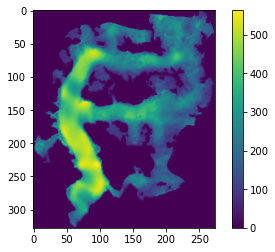

In [5]:
im = plt.imshow(geology['thkinit'][:])
plt.colorbar(im)
plt.show()

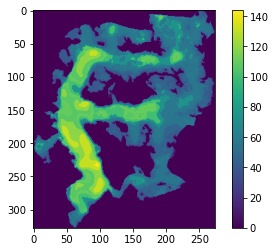

In [6]:
im = plt.imshow(geology['thkobs_std'][:])
plt.colorbar(im)
plt.show()

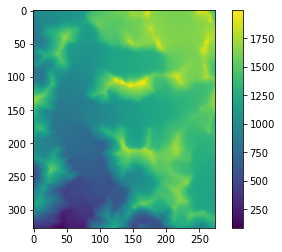

In [7]:
im = plt.imshow(ex['usurf'][0])
plt.colorbar(im)
plt.show()

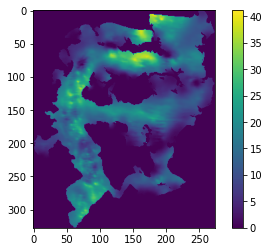

In [8]:
im = plt.imshow(geology['slidingco'][:])
plt.colorbar(im)
plt.show()

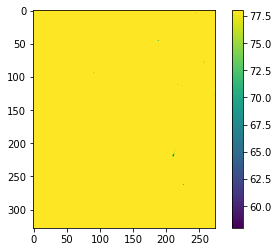

In [9]:
im = plt.imshow(geology['arrhenius'][:])
plt.colorbar(im)
plt.show()

In [9]:
im = plt.imshow(optimize['velsurf_mag'][-1] - optimize['velsurfobs_mag'][-1])
plt.colorbar(im)
plt.show()

NameError: name 'optimize' is not defined

In [10]:
im = plt.imshow(optimize['velsurf_mag'][-1])
plt.colorbar(im)
plt.show()

NameError: name 'optimize' is not defined

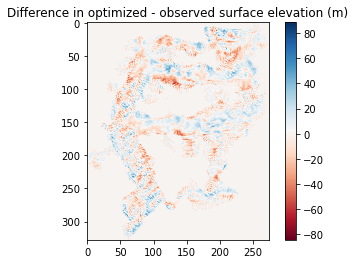

In [11]:
im = plt.imshow(geology['usurf'][:] - geology['usurfobs'][:], cmap = 'RdBu')
plt.title('Difference in optimized - observed surface elevation (m)')
plt.colorbar(im)
plt.show()

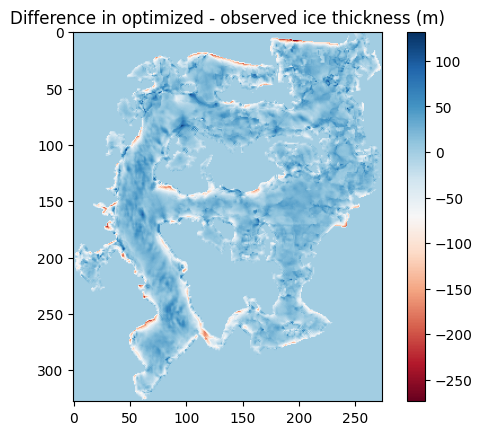

In [15]:
im = plt.imshow(geology['thk'][:] - geology['thkobs'][:], cmap = 'RdBu')
plt.title('Difference in optimized - observed ice thickness (m)')
plt.colorbar(im)
plt.show()

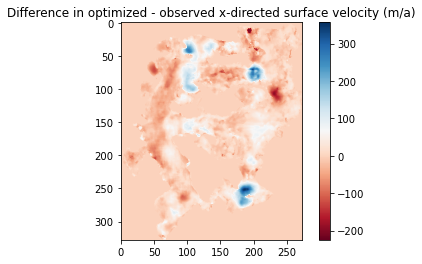

In [12]:
im = plt.imshow(geology['uvelsurfobs'][:] - ex['uvelsurf'][0], cmap = 'RdBu')
plt.title('Difference in optimized - observed x-directed surface velocity (m/a)')
plt.colorbar(im)
plt.show()

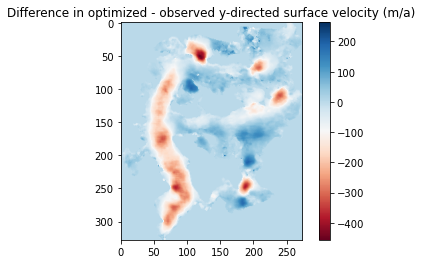

In [13]:
im = plt.imshow(geology['vvelsurfobs'][:] - ex['vvelsurf'][0], cmap = 'RdBu')
plt.title('Difference in optimized - observed y-directed surface velocity (m/a)')
plt.colorbar(im)
plt.show()

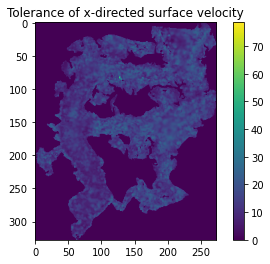

In [14]:
im = plt.imshow(geology['uvelsurfobs_std'][:], cmap = 'viridis')
plt.title('Tolerance of x-directed surface velocity')
plt.colorbar(im)
plt.show()

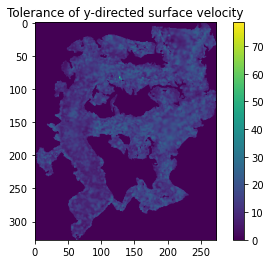

In [15]:
im = plt.imshow(geology['vvelsurfobs_std'][:], cmap = 'viridis')
plt.title('Tolerance of y-directed surface velocity')
plt.colorbar(im)
plt.show()

In [16]:
ex.variables.keys()

dict_keys(['time', 'y', 'x', 'topg', 'usurf', 'thk', 'velbar_mag', 'velsurf_mag', 'divflux', 'uvelsurf', 'vvelsurf', 'uvelbase', 'vvelbase'])

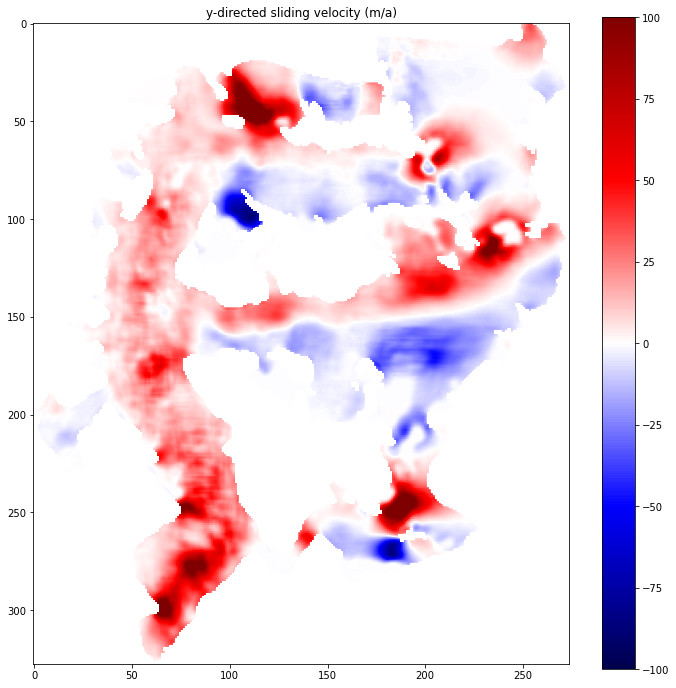

In [16]:
fig, ax = plt.subplots(figsize = (12, 12))
toplot = np.where(ex['thk'][0] > 0, ex['vvelbase'][0], np.nan)

im = ax.imshow(toplot, cmap = 'seismic', vmin = -100, vmax = 100)
plt.title('y-directed sliding velocity (m/a)')
plt.colorbar(im)
plt.show()

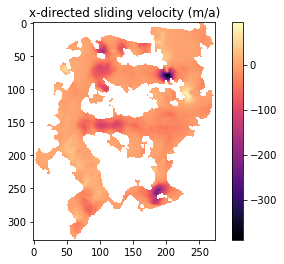

In [17]:
toplot = np.where(ex['thk'][0] > 0, ex['uvelbase'][0], np.nan)

im = plt.imshow(toplot, cmap = 'magma')
plt.title('x-directed sliding velocity (m/a)')
plt.colorbar(im)
plt.show()

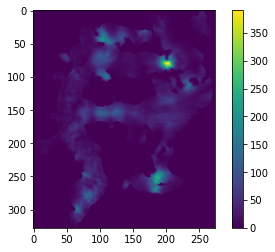

In [18]:
toplot = np.sqrt(ex['uvelbase'][0]**2 + ex['vvelbase'][0]**2)

im = plt.imshow(toplot, cmap = 'viridis')
plt.title('')
plt.colorbar(im)
plt.show()

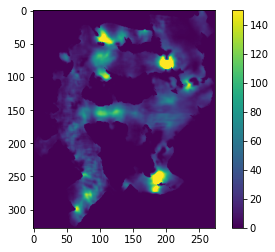

In [19]:
toplot = np.sqrt(ex['uvelbase'][0]**2 + ex['vvelbase'][0]**2)

im = plt.imshow(toplot, cmap = 'viridis', vmin = 0, vmax = 150)
plt.title('')
plt.colorbar(im)
plt.show()

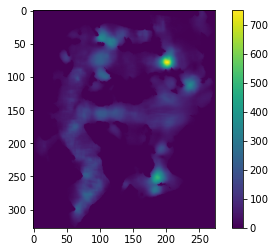

In [20]:
toplot = np.sqrt(ex['uvelsurf'][0]**2 + ex['vvelsurf'][0]**2)

im = plt.imshow(toplot, cmap = 'viridis')
plt.title('')
plt.colorbar(im)
plt.show()

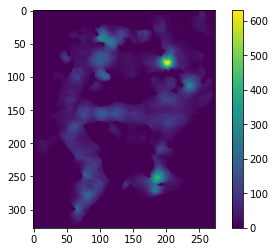

In [21]:
toplot = ex['velbar_mag'][0]

im = plt.imshow(toplot, cmap = 'viridis')
plt.title('')
plt.colorbar(im)
plt.show()

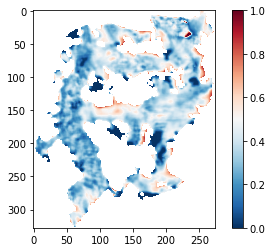

In [22]:
velbase_mag = np.sqrt(ex['uvelbase'][0]**2 + ex['vvelbase'][0]**2)
toplot = velbase_mag / ex['velsurf_mag'][0]

im = plt.imshow(toplot, cmap = 'RdBu_r', vmax = 1, vmin = 0)
plt.title('')
plt.colorbar(im)
plt.show()

In [7]:
from matplotlib.animation import FuncAnimation

MovieWriter ffmpeg unavailable; using Pillow instead.


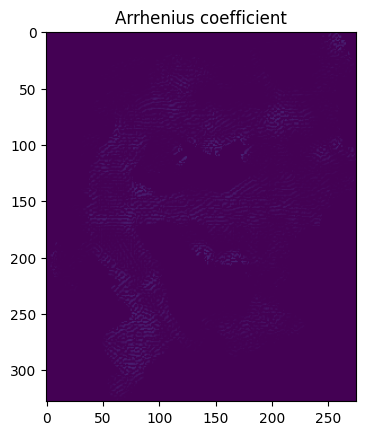

In [54]:
fig, ax = plt.subplots()

im = plt.imshow(optimize['arrhenius'][0], cmap = 'viridis_r', vmax = 78, vmin = 76)

def animate(t):
    im.set_array(optimize['arrhenius'][t])
    return im

anim = FuncAnimation(fig, animate, frames = 20, interval = 100)
ax.set_title('Arrhenius coefficient')
    
anim.save('./arrhenius.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


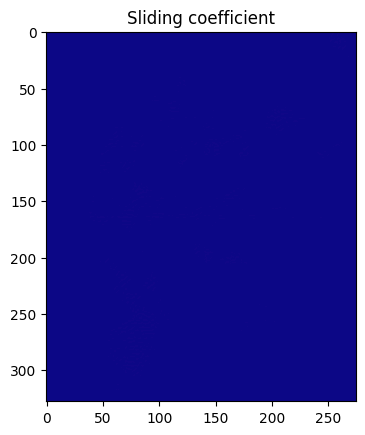

In [48]:
fig, ax = plt.subplots()

im = plt.imshow(optimize['slidingco'][0], cmap = 'plasma', vmax = 25)

def animate(t):
    im.set_array(optimize['slidingco'][t])
    return im

anim = FuncAnimation(fig, animate, frames = 20, interval = 100)
ax.set_title('Sliding coefficient')
    
anim.save('./sliding.gif')